# Predicting the quality of wine using Linear Regression

In [1]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
# Read the data in csv format

df = pd.read_csv("data/winequality-white.csv", sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


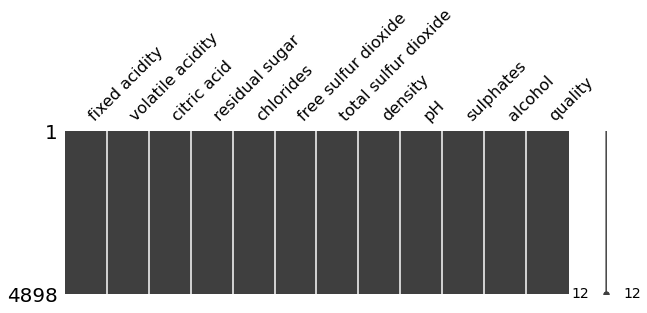

In [4]:
# Checking missing data using fency library missingno
msno.matrix(df, figsize = (10, 3));

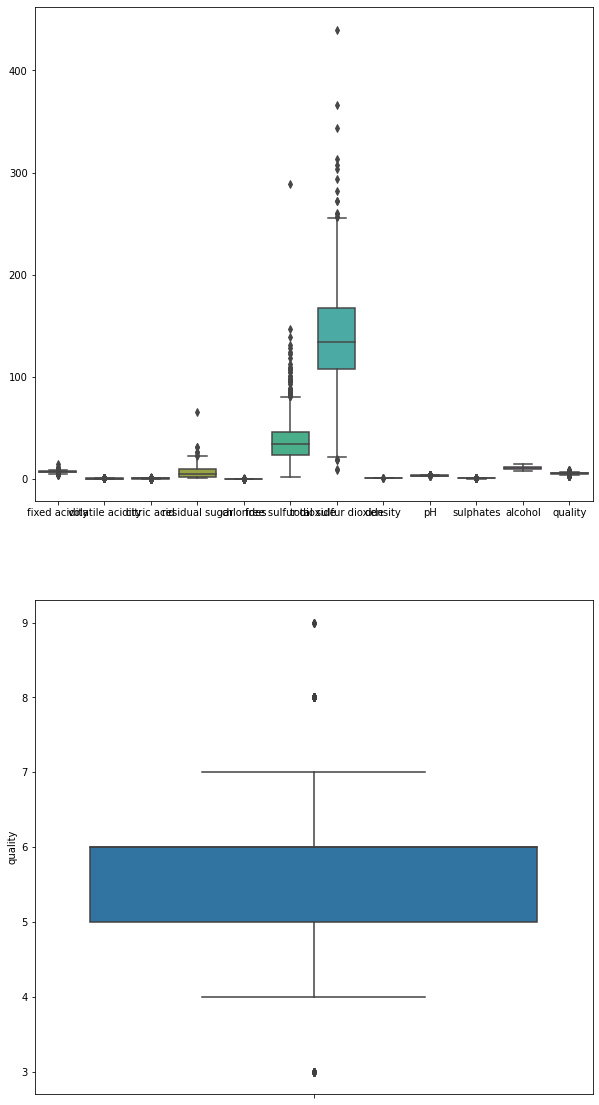

In [5]:
# Checking distribution using plot
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_size_inches(10, 20)
sns.boxplot(data = df, orient = "v", ax = axes[0]); # For features
sns.boxplot(data = df, orient = "v", ax = axes[1], y = "quality"); # For labels

<b>Correlation matrix</b> is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.



In [6]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


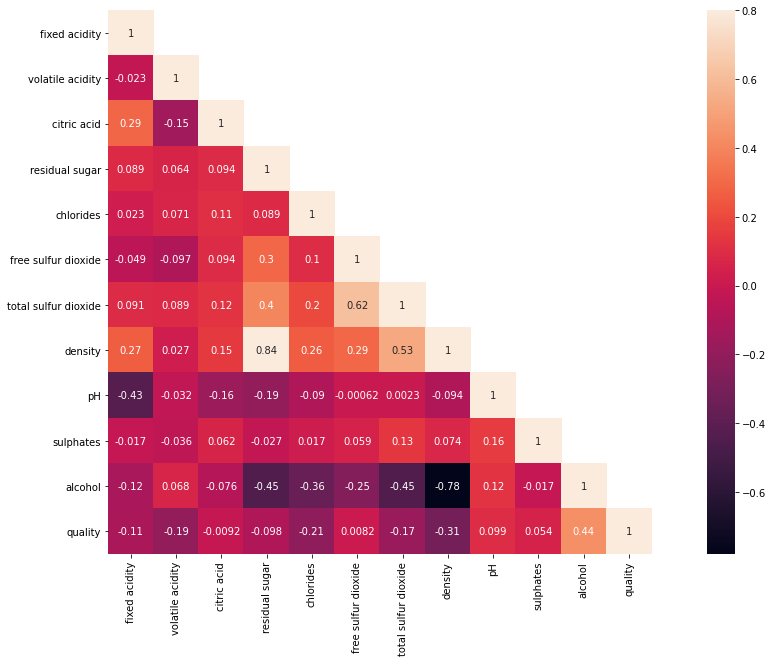

In [7]:
# Correlation Analysis

corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask = mask, vmax = 0.8, square = True, annot = True);

In [8]:
# performing Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Data preparation for splitting
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Adding an extra column
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Scalint the data
scaler = StandardScaler() # In scalar this formula is applied on training dataset X:- (y = (x – mean) / standard_deviation)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)


### Evaluation and improving a model

Evaluate a model using scikit learn matrix<br>
Explore and using backward elimination

In [9]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.2713199892292537

#### Backward Elimination

<b>step-1:</b> Select the significance level<br>
<b>step-2:</b> Fit the model with all independent varaibles<br>
<b>step-3:</b> Chose independent variable with highest P-value , if p value> SL, go to step 4 otherwise model is done<br>
<b>step-4:</b> Remove the independent varaible<br>
<b>step-5:</b> Fit the model without this variable and go to step 3

In [10]:
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)

In [11]:
X

array([[ 1.  ,  1.  ,  7.  , ...,  3.  ,  0.45,  8.8 ],
       [ 1.  ,  1.  ,  6.3 , ...,  3.3 ,  0.49,  9.5 ],
       [ 1.  ,  1.  ,  8.1 , ...,  3.26,  0.44, 10.1 ],
       ...,
       [ 1.  ,  1.  ,  6.5 , ...,  2.99,  0.46,  9.4 ],
       [ 1.  ,  1.  ,  5.5 , ...,  3.34,  0.38, 12.8 ],
       [ 1.  ,  1.  ,  6.  , ...,  3.26,  0.32, 11.8 ]])

In [12]:
import statsmodels.api as sm

X_opt = X[: , [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     183.0
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        18:59:38   Log-Likelihood:                -5575.5
No. Observations:                4898   AIC:                         1.117e+04
Df Residuals:                    4887   BIC:                         1.124e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        141.9285      4.317     32.880      0.000     133.466     150.391
x1           141.9285      4.317     32.880      0.000     133.466     150.391
x2             0.1663      0.017      9.940      0.000       0.134       0.199
x3            -1.6986      0.113    -15.082      0.000      -1.919      -1.478
x4             0.0941      0.096      0.980      0.327      -0.094       0.282
x5             0.1284      0.005     27.145      0.000       0.119       0.138
x6            -0.2864      0.550     -0.521      0.603      -1.365       0.792
x7             0.0031      0.001      3.624      0.000       0.001       0.005
x8            -0.0002      0.000     -0.422      0.673      -0.001       0.001
x9          -285.3888      8.875    -32.158      0.000    -302.787    -267.991
x10            1.1625      0.087     13.292      0.000       0.991       1.334
x11            0.8292      0.098      8.470      0.000       0.637       1.021
==============================================================================
Omnibus:                      220.369   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.160
Skew:                           0.171   Prob(JB):                    4.88e-141
Kurtosis:                       4.746   Cond. No.                     4.73e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.92e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Analyzing results

Analyzing result<br>
plot library

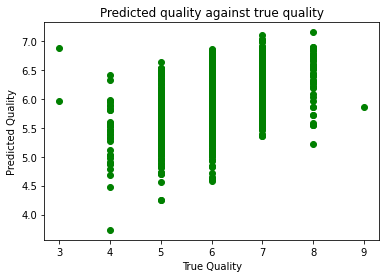

In [13]:
# Display the results

plt.scatter(y_test, predictions, c="g")
plt.xlabel("True Quality")
plt.ylabel("Predicted Quality")
plt.title("Predicted quality against true quality")
plt.show()